# Coffee Sales - Insights & Visualization
The notebook is processing a public Coffee Sales data set, taken from Kaggle. It is located at https://www.kaggle.com/datasets/ihelon/coffee-sales. The dataset contains records of coffee sales from a real-world vending machine. The `.csv` file with all the data is located at [data/data_set.csv](data/data_set.csv)

**Note:** From now on, we will consider that the data set is provided by a client company, that I am working on as a data science consultant

## Business and data visualization context

- **Audience**: The CEO and the Sales Manager of the company
- **Action**: Optimize the company's sales
- **How**:
    - Explore the insights and trends of the data set
    - Explane information in the written document form, utlizing visualization techniques 

#### What data available
Sales of a single coffee vending machine from March 2024 to the end of February 2025. Including:
- Date time, precise to seconds 
- Cash or card is used
- Amount of money spent (in Ukranian currency, hryvnia)
- Coffee drink name

## Data exploration & preprocessing

Firstly, let's import the data set using `pandas` and then get a basic picture of what infromation it contains

In [95]:
from pathlib import Path

import pandas as pd


CSV_FILE_PATH = Path("data/data_set.csv")
df = pd.read_csv(CSV_FILE_PATH)

In [96]:
print("Head of the data set:")
print(df.head())

print("\nData info:")
print(df.info(verbose=True))

Head of the data set:
         date                 datetime cash_type                 card  money  \
0  2024-03-01  2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   38.7   
1  2024-03-01  2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   38.7   
2  2024-03-01  2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   38.7   
3  2024-03-01  2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   28.9   
4  2024-03-01  2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   38.7   

     coffee_name  
0          Latte  
1  Hot Chocolate  
2  Hot Chocolate  
3      Americano  
4          Latte  

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3263 non-null   object 
 1   datetime     3263 non-null   object 
 2   cash_type    3263 non-null   object 
 3   card         3174 non-null   object 
 4   money   

Now, lets do basic preprocessing and handle potential data quality issues:
- Check `null` values
- Validate and convert the values types in every column
- In the case of the `cash_type` and `coffy_type`, ensure that all the unique values are appropriate
- Make sure that in every row, the `datetime` value aligns with the `date` value

In [97]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64


So only the `card` column has cell with missing values. We assume that those are the ones, when the `cash_type` is `cash`. We will validate this later

Conver the `date` and `datatime` values to the datetime Pandas type. Then check if there are any corrupted entries adn what are the boundaries of the reserached time period

In [ ]:
df["date"] = pd.to_datetime(df["date"], errors="coerce")
df["datetime"] = pd.to_datetime(df["datetime"], errors="coerce")

print("\nEntries with invalid 'date' values:")
print(df[df["date"].isnull()])

print("\nEntries with invalid 'datetime' values:")
print(df[df["datetime"].isnull()])


start_date, end_date = df["datetime"].min(), df["datetime"].max()

print("\nStart:", start_date)
print("End:", end_date)


Entries with invalid 'date' values:
Empty DataFrame
Columns: [date, datetime, cash_type, card, money, coffee_name]
Index: []

Entries with invalid 'datetime' values:
Empty DataFrame
Columns: [date, datetime, cash_type, card, money, coffee_name]
Index: []

Start: 2024-03-01 10:15:50.520000
End: 2025-02-25 19:32:40.434000


We can see, that all the `date` and `datetime` cells are not corrupted and there are no `null` entries  
We also can rely on that the data set covers the whole year from March 2024 to February 2025. 

Conver the `money` column cells to be of a numeric Pandas type. Check if any values are corrupted

In [99]:
df["money"] = pd.to_numeric(df["money"], errors="coerce")

print("\nEntries with invalid 'money' values:")
print(df[df["money"].isnull()])


Entries with invalid 'money' values:
Empty DataFrame
Columns: [date, datetime, cash_type, card, money, coffee_name]
Index: []


Make sure that `cash_type` and `coffee_name` values are adequate

In [100]:
print("\nUnique values in 'cash_type':")
print(df["cash_type"].unique())

print("\nUnique values in 'coffee_name':")
print(df["coffee_name"].unique())


Unique values in 'cash_type':
['card' 'cash']

Unique values in 'coffee_name':
['Latte' 'Hot Chocolate' 'Americano' 'Americano with Milk' 'Cocoa'
 'Cortado' 'Espresso' 'Cappuccino']


Check if there are any rows where `date` and `datetime` values are misaligned (not related to the same date)

In [101]:
misaligned = df[
    pd.to_datetime(df["datetime"], errors="coerce").dt.date
    != pd.to_datetime(df["date"], errors="coerce").dt.date
]

print("Rows with misaligned `date` and `datetime` values:")
print(misaligned)

Rows with misaligned `date` and `datetime` values:
Empty DataFrame
Columns: [date, datetime, cash_type, card, money, coffee_name]
Index: []


Before we found out that there are `card` cells with no values. Let's check if all of them are related to the rows where `cash_type` is `cash`

In [102]:
misaligned = df[df["card"].isnull() & (df["cash_type"] != "cash")]

print("Rows with misaligned `card` and `cash_type` values:")
print(misaligned)

Rows with misaligned `card` and `cash_type` values:
Empty DataFrame
Columns: [date, datetime, cash_type, card, money, coffee_name]
Index: []


Check how the data frame looks now after the preprocessing

In [103]:
print("Current form of the data")
print(df.info(verbose=True))

Current form of the data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         3263 non-null   datetime64[ns]
 1   datetime     3263 non-null   datetime64[ns]
 2   cash_type    3263 non-null   object        
 3   card         3174 non-null   object        
 4   money        3263 non-null   float64       
 5   coffee_name  3263 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(3)
memory usage: 153.1+ KB
None


### Conclusion:
We have got the basic understanding of what data we work with, we made a basic preprocessing of it, and made sure that there are no obvious mistakes (corrupted data).

We don't require any special data curation technics Throughout the further steps, we should only keep in mind that `card` cells are null when `cash_type` is `cash`

During the analysis, we work with a full year time period, **from March 2024 to February 2025**. 

## Explanatory
Let's go through interesting insights of the data.  
Start from importing the required packages and setting a style of the plots

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

### Average Sales Frequency Throughout the Day
Let's analyze, how many sales happen on average an hour. Thank's to this, we will see the dynamics, know what hours are the most productive, and see if there are any peak hours.

**Importance for the business**:
- optimize the operations of the vending machine
- priorotize the productive hours and get more out of them
- make further analysis of hours with low sales and try to boost them

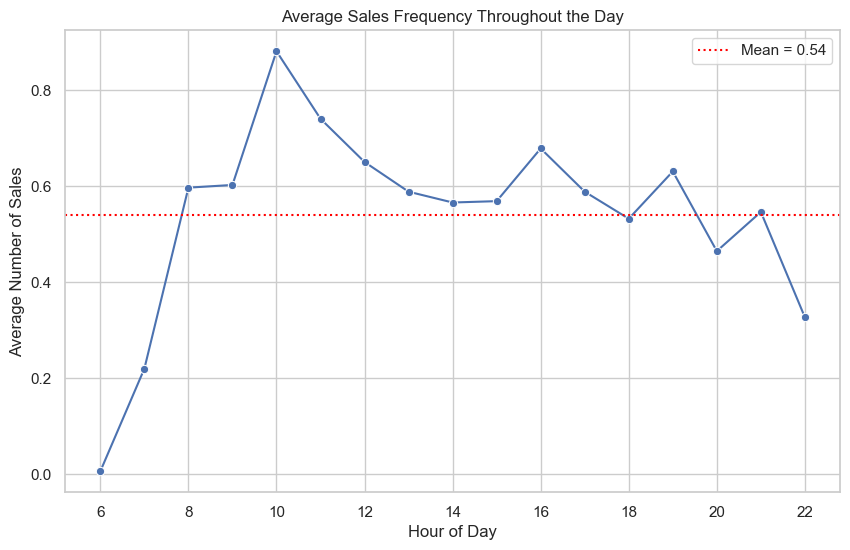

In [ ]:
hours_series = df["datetime"].dt.hour
dates_series = df["datetime"].dt.date

sales_counts = hours_series.value_counts().sort_index()
n_days = dates_series.nunique()
avg_sales_per_hour_series = sales_counts / n_days

# Exclude the night period
avg_sales_per_hour_series = avg_sales_per_hour_series[avg_sales_per_hour_series > 0]

plt.figure(figsize=(10, 6))
sns.lineplot(
    x=avg_sales_per_hour_series.index, y=avg_sales_per_hour_series.values, marker="o"
)

# Step of 2 hours
plt.xticks(
    range(
        min(avg_sales_per_hour_series.index),
        max(avg_sales_per_hour_series.index) + 1,
        2,
    )
)

plt.xlabel("Hour of Day")
plt.ylabel("Average Number of Sales")
plt.title("Average Sales Frequency Throughout the Day")

mean = avg_sales_per_hour_series.mean()
plt.axhline(y=mean, color="red", linestyle=":", label=f"Mean = {mean:.2f}")
plt.legend()

plt.show()

#### Code overview
1. Based on the whole data set, calculate the `avg_sales_per_hour_series`
2. Exclude the hours (firstly night time), when there are no sales at all
3. Draw the line plot
4. Calculate the global mean value (excluding the hours when there are no sales at all), add it as a red dotted line to the plot. 

#### Insights:
- The peak of the sales takes place at 10-11 AM, likely because of the morning rush. 
- The sales has a decrease trend after 16 o'clock

#### Implication:
- Priorotize firstly the 10-11 AM period, secondly the day hours from 8 to 17 o'clock
- Aim to boost the sales from 6 to 9 AM and 18 to 22 o'clock

### Monthly Coffee Sales
Visualize the dynamics of monthly sales during the year

**Importance for the business**:
- Analyze the dynamics
- See the best and worst months

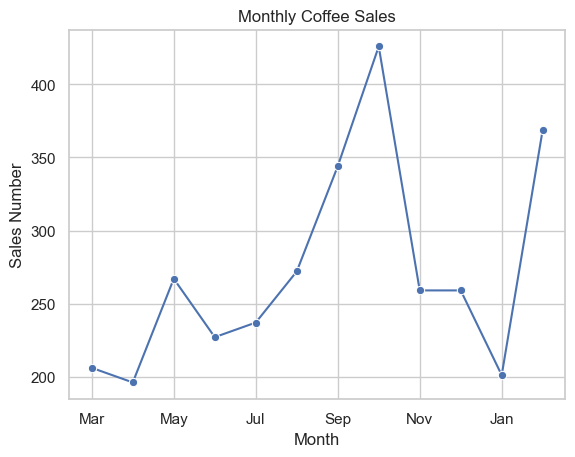

In [106]:
import calendar

monthly_sales_df = df.groupby(df["datetime"].dt.month).size().reset_index(name="sales")
monthly_sales_df.rename(columns={"datetime": "month"}, inplace=True)

custom_order = list(range(3, 13)) + list(range(1, 3))
monthly_sales_df = (
    monthly_sales_df.set_index("month").reindex(custom_order).reset_index()
)
monthly_sales_df["order"] = range(len(monthly_sales_df))


sns.lineplot(x="order", y="sales", data=monthly_sales_df, marker="o")

plt.xlabel("Month")
plt.ylabel("Sales Number")
plt.title("Monthly Coffee Sales")

tick_positions = monthly_sales_df["order"][::2]
tick_labels = [calendar.month_abbr[m] for m in monthly_sales_df["month"][::2]]
plt.xticks(tick_positions, tick_labels)

plt.show()

#### Code overview
1. Calculate the monthly sales, we easily do this since the data set covers precisely a one year period
2. Use march as the start month of the year, as it is the beginning of the observations
3. Draw the line graph: use months abbreviation names on the x-axis

#### Insights:
- There was a steady, almost dubling, growth from June to October
- The sales number dropped significantly in Novermber, declined even more in January, but jumped back in February

#### Implication:
- Study the reasons of the constant growth from June to October
- Investigate why the sales decreased and remained low from November to January

### Total Revenue by Coffee Type
Show how much revenue has every coffee drink generated during the year.

**Importance for the business**:
- Identify the best and worst-selling types of coffee

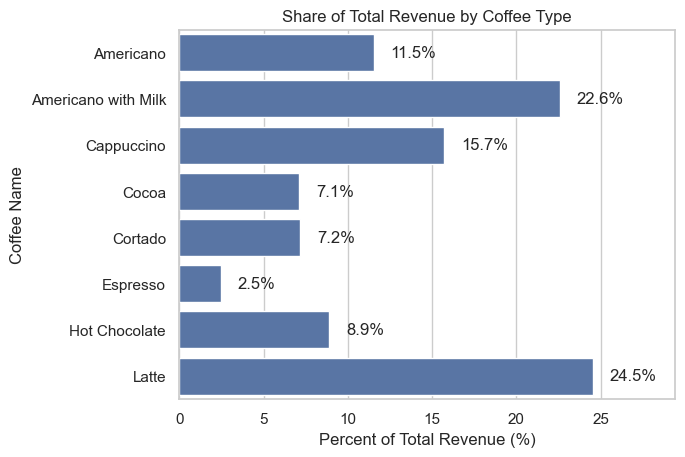

In [119]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = df.groupby("coffee_name", as_index=False)["money"].sum()

total_revenue = df["money"].sum()
data["percent"] = data["money"] / total_revenue * 100

ax = sns.barplot(data=data, x="percent", y="coffee_name")

# extend x-axis length
max_percent = data["percent"].max()
plt.xlim(0, max_percent * 1.2)

for i, p in enumerate(data["percent"]):
    ax.text(p + 1, i, f"{p:.1f}%", va="center")

plt.xlabel("Percent of Total Revenue (%)")
plt.ylabel("Coffee Name")
plt.title("Share of Total Revenue by Coffee Type")
plt.show()

#### Code overview
1. Calculate a share of revenue every type of coffee generates
2. Draw a horizontal bar plot, as the names are long
3. Add the percen values to the right of bars

#### Insights:
- Latte and Americano with Milk are making almost a half of the revenue
- Espresso is the worst-selling drink, with 2.5% total revenue share
- Cocoa, Cortado, and Hot Chocolate are making less than 9% each

#### Implication:
- Priorotize firstly the Latte and Americano with Milk drinks
- Try to boost the sales of the worst-selling drinks
- Consider removing the worst-selling coffee types, firstly Hot Chocolate and Cocoa, as they require special ingridients 